In [8]:
%matplotlib inline

#An introduction to machine learning with scikit-learn

##Loading an example dataset

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

In [10]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

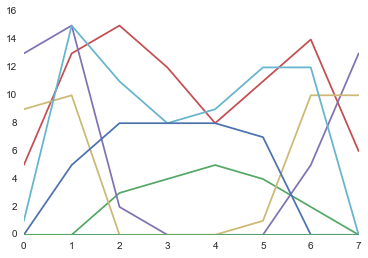

In [11]:
import matplotlib.pyplot as plt

plt.plot(digits.images[0])

plt.show()

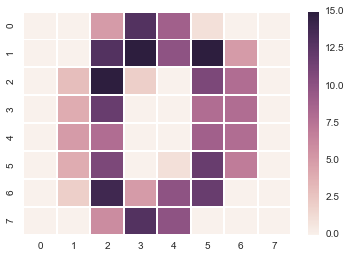

In [12]:
import seaborn as sns

sns.heatmap(digits.images[0])

##Learning and predicting

In [13]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

In [16]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [18]:
res = clf.predict(digits.data[-1])
res

array([8])

##Model persistence

In [25]:
from sklearn import svm, datasets

clf = svm.SVC()
iris = datasets.load_iris()

X, y = iris.data, iris.target

clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
import pickle

s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0]) == y[0]

array([ True], dtype=bool)

Joblib is optimized for big data but cannot dump into strings.

In [28]:
from sklearn.externals import joblib

joblib.dump(clf, 'filename.pk')

['filename.pk',
 'filename.pk_01.npy',
 'filename.pk_02.npy',
 'filename.pk_03.npy',
 'filename.pk_04.npy',
 'filename.pk_05.npy',
 'filename.pk_06.npy',
 'filename.pk_07.npy',
 'filename.pk_08.npy',
 'filename.pk_09.npy',
 'filename.pk_10.npy',
 'filename.pk_11.npy']

In [29]:
clf = joblib.load('filename.pk')

In [30]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#A tutorial on statistical-learning for scientific data processing

##Statistical learning: the setting and the estimator object in scikit-learn

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [35]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [36]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

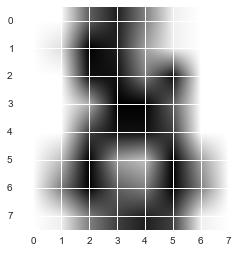

In [37]:
import pylab as pl

pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)

##Supervised learning: predicting an output variable from high-dimensional observations

###Nearest neighbor and the curse of dimensionality¶

In [44]:
iris_X = iris.data
iris_y = iris.target

In [45]:
import numpy as np

np.unique(iris_y)

array([0, 1, 2])

In [48]:
np.random.seed(0)

indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [51]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [52]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

###Linear model: from regression to sparsity

In [53]:
diabetes = datasets.load_diabetes()

diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [54]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


The mean square error

In [59]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898225

Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between X and Y.

In [61]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

In [65]:
X = np.c_[.5, 1].T
X

array([[ 0.5],
       [ 1. ]])

In [66]:
y = [.5, 1]
y

[0.5, 1]

In [67]:
test = np.c_[0, 2].T
test

array([[0],
       [2]])

In [68]:
regr = linear_model.LinearRegression()

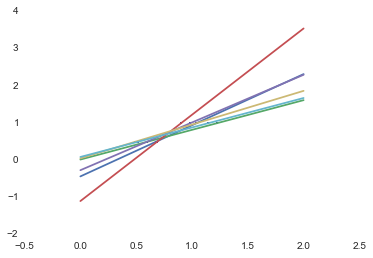

In [69]:
import pylab as pl

pl.figure()

np.random.seed(0)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

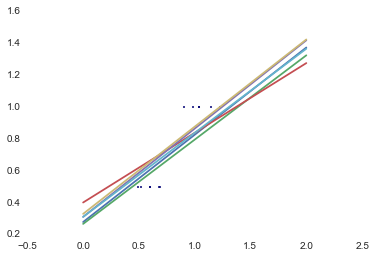

In [78]:
regr = linear_model.Ridge(alpha=.1)

pl.figure()

np.random.seed(0)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

In [107]:
alphas = np.logspace(-4, -1, 6)
alphas

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

In [116]:
import pandas as pd

df = pd.DataFrame({
            'x': np.linspace(-4, -1, 6),
            'y': alphas
    })
df

,x,y
0,-4.0,0.000100
1,-3.4,0.000398
2,-2.8,0.001585
3,-2.2,0.006310
4,-1.6,0.025119
5,-1.0,0.100000


In [115]:
# sns.lmplot('x', 'y', df)

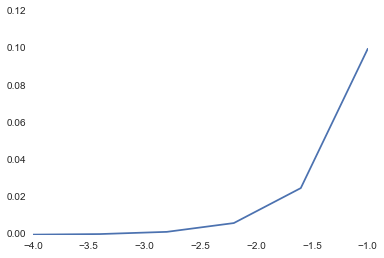

In [97]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(np.linspace(-4, -1, 6), alphas)

plt.show()

In [109]:
print([regr.set_params(alpha=alpha)
       .fit(diabetes_X_train, diabetes_y_train)
       .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.58511106838835292, 0.58520730154446765, 0.58546775406984908, 0.58555120365039159, 0.58307170855541612, 0.57058999437280089]


####Sparsity

In [111]:
regr = linear_model.Lasso()

In [113]:
scores = [regr.set_params(alpha=alpha)
         .fit(diabetes_X_train, diabetes_y_train)
         .score(diabetes_X_test, diabetes_y_test)
         for alpha in alphas]
scores

[0.58511910691622271,
 0.58524713649060511,
 0.58571895391793527,
 0.58730094854527404,
 0.58876224183092607,
 0.5828450029681681]

In [114]:
best_alpha = alphas[scores.index(max(scores))]
best_alpha

0.025118864315095794

In [117]:
regr.alpha = best_alpha

regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


####Classification

In [119]:
logistic = linear_model.LogisticRegression(C=1e5)

logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

#####Exercise

In [120]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [123]:
n_samples = len(X_digits)

X_digits_train = X_digits[:0.9 * n_samples]
y_digits_train = y_digits[:0.9 * n_samples]
X_digits_test = X_digits[0.9 * n_samples:]
y_digits_test = y_digits[0.9 * n_samples:]

In [125]:
knn = neighbors.KNeighborsClassifier()

knn.fit(X_digits_train, y_digits_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [130]:
y_digits_predicted = knn.predict(X_digits_test)
y_digits_predicted[:10]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1])

In [129]:
y_digits_test[:10]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1])

In [136]:
sum(y_digits_predicted == y_digits_test) / float(len(y_digits_test))

0.96111111111111114

In [142]:
regr = linear_model.LogisticRegression()

regr.fit(X_digits_train, y_digits_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [143]:
y_digits_predicted = regr.predict(X_digits_test)
y_digits_predicted[:10]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1])

In [144]:
y_digits_test[:10]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1])

In [145]:
sum(y_digits_predicted == y_digits_test) / float(len(y_digits_test))

0.93888888888888888

In [146]:
print("KNN: {}".format(knn.score(X_digits_test, y_digits_test)))
print("Logistic Regression: {}".format(regr.score(X_digits_test, y_digits_test)))

KNN: 0.961111111111
Logistic Regression: 0.938888888889


###Support vector machines (SVMs)

####Linear SVMs

In [147]:
from sklearn import svm

svc = svm.SVC(kernel='linear')

svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [151]:
svc.score(iris_X_test, iris_y_test)

0.90000000000000002

In [149]:
svc = svm.SVC(kernel='poly', degree=3)

svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
svc.score(iris_X_test, iris_y_test)

0.90000000000000002

In [150]:
svc = svm.SVC(kernel='rbf')

svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [153]:
svc.score(iris_X_test, iris_y_test)

0.90000000000000002

####Exercise

In [196]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

In [197]:
np.random.seed(0)

n_samples = len(X)

In [198]:
indices = np.random.permutation(n_samples)
indices

array([26, 86,  2, 55, 75, 93, 16, 73, 54, 95, 53, 92, 78, 13,  7, 30, 22,
       24, 33,  8, 43, 62,  3, 71, 45, 48,  6, 99, 82, 76, 60, 80, 90, 68,
       51, 27, 18, 56, 63, 74,  1, 61, 42, 41,  4, 15, 17, 40, 38,  5, 91,
       59,  0, 34, 28, 50, 11, 35, 23, 52, 10, 31, 66, 57, 79, 85, 32, 84,
       14, 89, 19, 29, 49, 97, 98, 69, 20, 94, 72, 77, 25, 37, 81, 46, 39,
       65, 58, 12, 88, 70, 87, 36, 21, 83,  9, 96, 67, 64, 47, 44])

In [199]:
X_train = X[indices[:0.9 * n_samples], :]
y_train = y[indices[:0.9 * n_samples]]
X_test = X[indices[0.9 * n_samples:], :]
y_test = y[indices[0.9 * n_samples:]]

In [204]:
def score_svc_kernel(kernel):
    svc = svm.SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    return svc.score(X_test, y_test)

In [205]:
score_svc_kernel('linear')

0.59999999999999998

In [206]:
score_svc_kernel('poly')

0.59999999999999998

In [207]:
score_svc_kernel('rbf')

0.59999999999999998

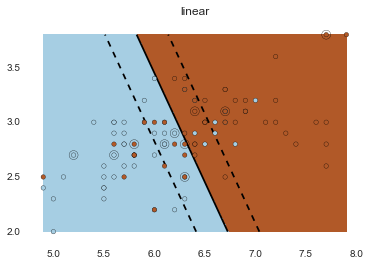

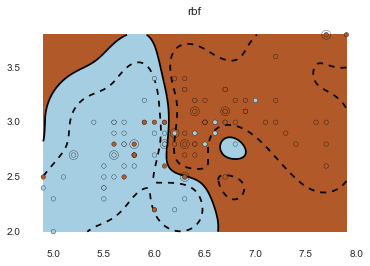

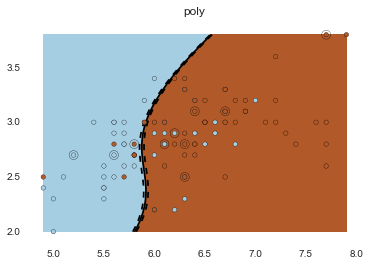

In [215]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title(kernel)

plt.show()

##Model selection: choosing estimators and their parameters

###Score, and cross-validated scores

In [226]:
from sklearn import datasets, svm

digits = datasets.load_digits()

X_digits = digits.data
y_digits = digits.target

svc = svm.SVC(C=1, kernel='linear')

svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [228]:
import numpy as np

X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)

scores = list()

for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


###Cross-validation generators